## Customer Churn Prediction

Develop a model to predict customer churn for a subscriptionbased service or business. Use historical customer data, including
features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Loading Dataset

In [3]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Preprocessing

In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
#Droping useless features
data = data.drop(columns = ["RowNumber", "CustomerId", "Surname"])
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#One hot encoding
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
data['Gender'] = data['Gender'].astype(int)

In [12]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Geography'] = encoder.fit_transform(data['Geography'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Data Analysis and Visualization

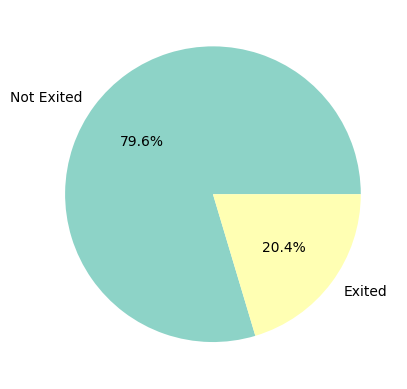

Exited
0    7963
1    2037
Name: count, dtype: int64


In [14]:
value = data['Exited'].value_counts()
plt.pie(value, labels = ["Not Exited", "Exited"], autopct = "%1.1f%%", colors = sns.color_palette('Set3'))
plt.show()
print(value)

In [15]:
corr = data.corr()

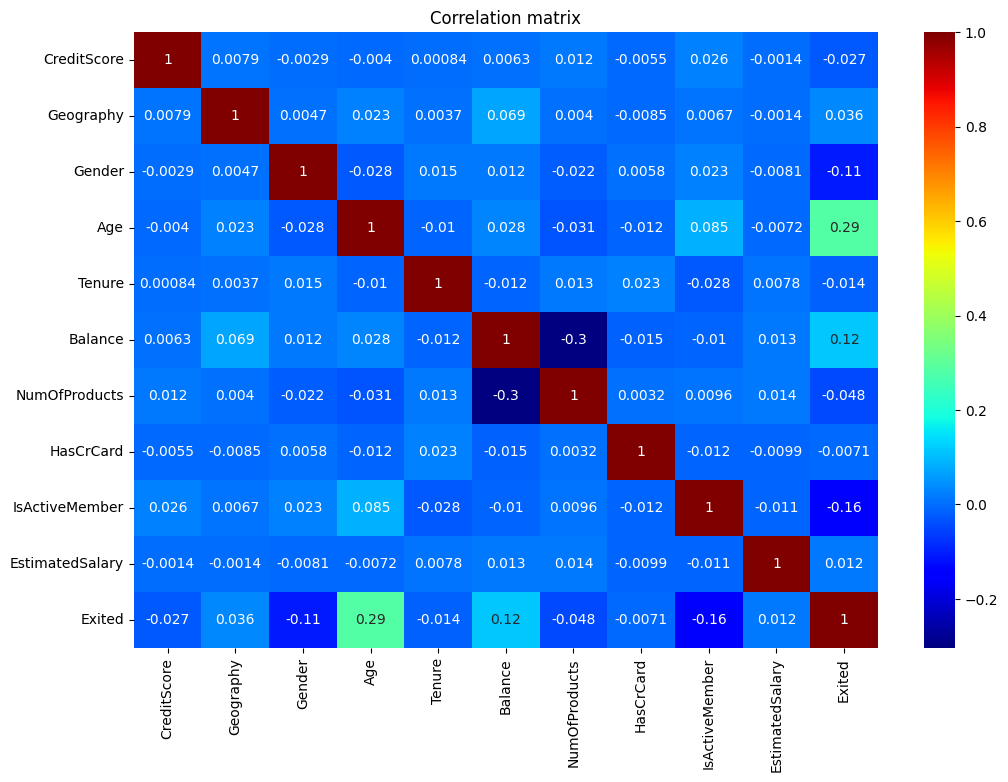

In [16]:
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = 'jet')
plt.title("Correlation matrix")
plt.show()

In [17]:
X = data.drop('Exited', axis = 1)
y = data['Exited']

### Balancing Data

In [18]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print("Class distribution before over sampling: ",Counter(y))
ros = RandomOverSampler(random_state = 42)
X, y = ros.fit_resample(X, y)
print("Class distribution after over sampling: ", Counter(y))

Class distribution before over sampling:  Counter({0: 7963, 1: 2037})
Class distribution after over sampling:  Counter({1: 7963, 0: 7963})


### Standardize Data

In [19]:
X = np.array(X)
X = (X-X.mean()) / X.std()

### Split Data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model Evaluation

In [21]:
col = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree']

In [22]:
accuracy = []

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#### 1. Logistic Regression 

In [24]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred_lr = lr_classifier.predict(X_test)

Accuracy (Logistic Regression):  0.5734463276836158
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.46      0.52      1633
           1       0.55      0.70      0.61      1553

    accuracy                           0.57      3186
   macro avg       0.58      0.58      0.57      3186
weighted avg       0.58      0.57      0.57      3186



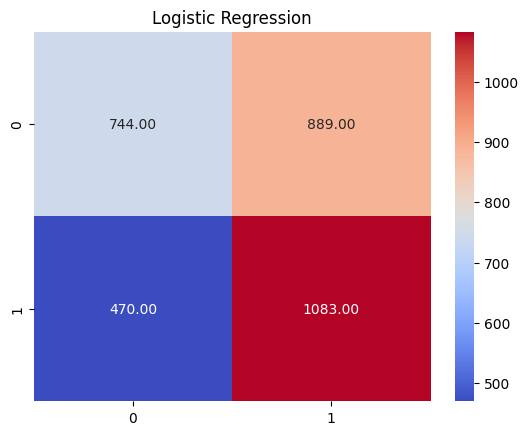

In [26]:
acc = accuracy_score(y_test, y_pred_lr)
print("Accuracy (Logistic Regression): ", acc)
accuracy.append(acc)

print("Classification report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Logistic Regression")
plt.show()

#### 2. Random Forest 

In [27]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred_rf = rf_classifier.predict(X_test)

Accuracy (Random Forest):  0.9504080351537979
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1633
           1       0.92      0.98      0.95      1553

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



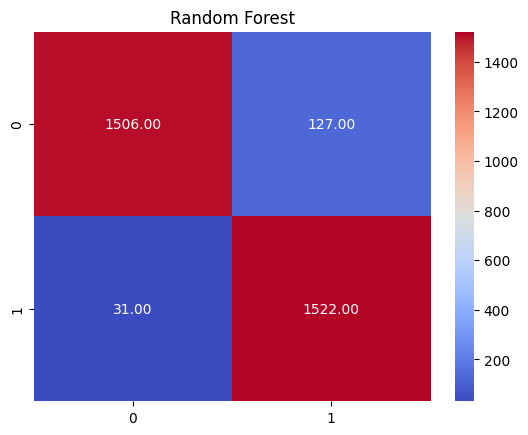

In [29]:
acc = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest): ", acc)
accuracy.append(acc)

print("Classification report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Random Forest")
plt.show()

#### 3. XG Boost (Gradient Boosting)

In [30]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
y_pred_xgb = xgb_classifier.predict(X_test)

Accuracy (Gradient Boosting):  0.8976773383553045
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      1633
           1       0.87      0.93      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



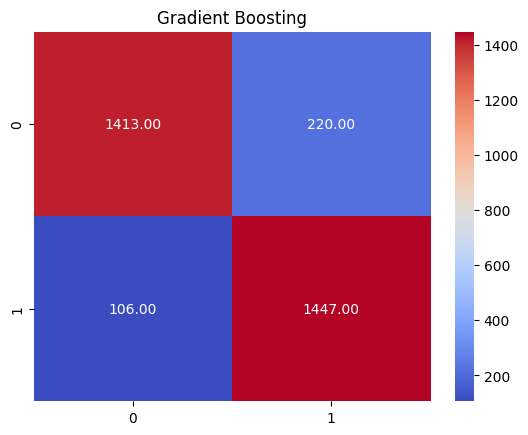

In [32]:
acc = accuracy_score(y_test, y_pred_xgb)
print("Accuracy (Gradient Boosting): ", acc)
accuracy.append(acc)

print("Classification report:\n", classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Gradient Boosting")
plt.show()

#### 4. Decision Tree 

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred_dt = dt.predict(X_test)

Accuracy (Decision Tree):  0.9168236032642813
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91      1633
           1       0.87      0.98      0.92      1553

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186



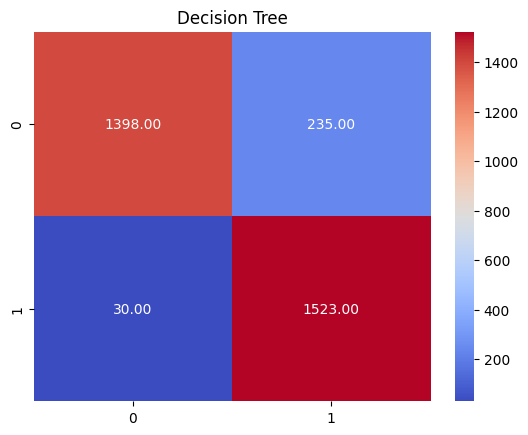

In [35]:
acc = accuracy_score(y_test, y_pred_dt)
print("Accuracy (Decision Tree): ", acc)
accuracy.append(acc)

print("Classification report:\n", classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Decision Tree")
plt.show()

### Visualizing results

In [36]:
accuracy

[0.5734463276836158,
 0.9504080351537979,
 0.8976773383553045,
 0.9168236032642813]

In [37]:
FinalResult = pd.DataFrame({'Algorithms': col, 'Accuracy': accuracy})

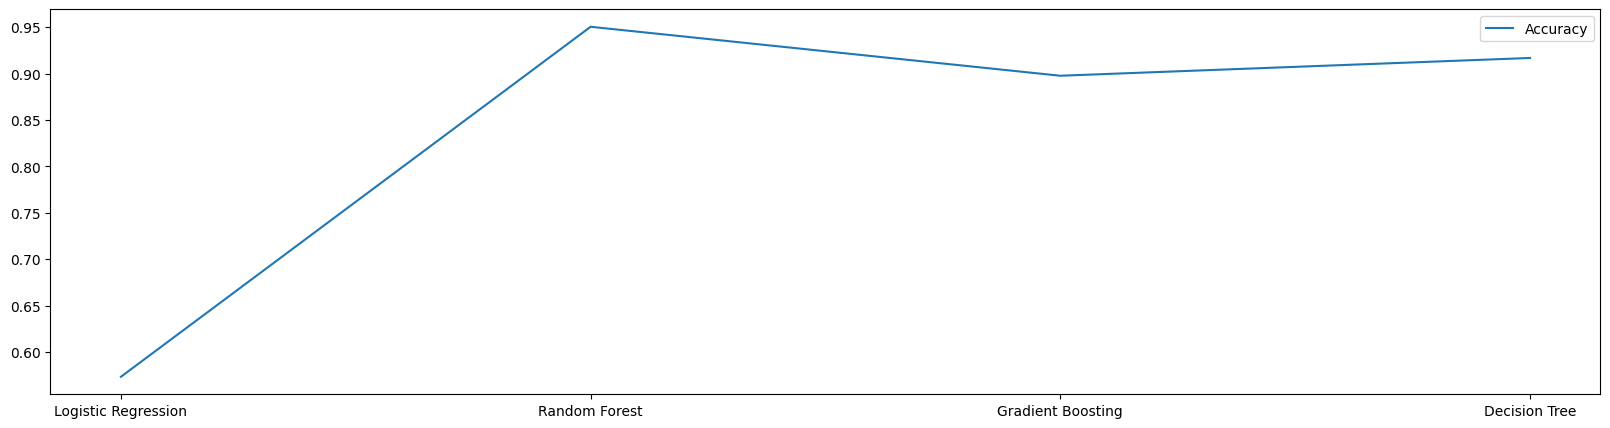

In [38]:
fig, ax = plt.subplots(figsize = (20, 5))
plt.plot(FinalResult.Algorithms, accuracy, label = 'Accuracy')
plt.legend()
plt.show()

## Random Forest has best accuracy of 95.04%